In [104]:
# Cálcula el porcentaje de error entre dos series de maáximos anuales.

import pandas as pd
import xarray as xr

from matplotlib import pyplot as plt
from scipy import stats

In [105]:
# Archivo 1.
i = 0
# Archivo 2.
j = 2
# Cantidad de celdas a eliminar del borde.
k = 2

name = [ "CHIRPS_comp", "CHIRPS_megalopolis", "prec_hist_comp_CHIRPS",
    "prec_hist_comp_estaciones", "prec_hist_hist" ]

path_orig = "../results/" + name[i] + "/" + name[i] + "_tretorno.nc" 
path_comp = "../results/" + name[j] + "/" + name[j] + "_tretorno.nc" 

ds_orig = xr.open_dataset(path_orig).drop( ["AÑO", "PROBABILIDAD"] )
ds_comp = xr.open_dataset(path_comp).drop( ["AÑO", "PROBABILIDAD"] )

if k != 0:
    ds_orig = ds_orig.isel(
        {"LONGITUD": slice(k, -k), "LATITUD": slice(k, -k)} )
    ds_comp = ds_comp.isel(
        {"LONGITUD": slice(k, -k), "LATITUD": slice(k, -k)} )    

vars = ["count", "mean", "std", "min", "25%", "50%", "75%", "max"]

In [106]:
# Error total.
error = ( ( ds_comp - ds_orig ) / ds_orig ).rename( {"INTENSIDAD": "P_ERROR"} )
error.to_netcdf("../results/comp_hist_CHIRPS.nc")
df_e = error.to_dataframe().reset_index()

tot = [ error["P_ERROR"].count(       ).values + 0,
        error["P_ERROR"].mean(        ).values + 0,
        error["P_ERROR"].std(         ).values + 0,
        error["P_ERROR"].min(         ).values + 0,
        error["P_ERROR"].quantile(0.25).values + 0,
        error["P_ERROR"].quantile(0.5 ).values + 0,
        error["P_ERROR"].quantile(0.75).values + 0,
        error["P_ERROR"].max(         ).values + 0 ]

print(f"Errores entre {name[i]} y {name[j]}")
for l in range( len(vars) ): print(f"{vars[l]}: {tot[l]:.2f}")

Errores entre CHIRPS_comp y prec_hist_comp_CHIRPS
count: 992496.00
mean: 0.83
std: 0.50
min: -0.83
25%: 0.53
50%: 0.83
75%: 1.11
max: 8.51


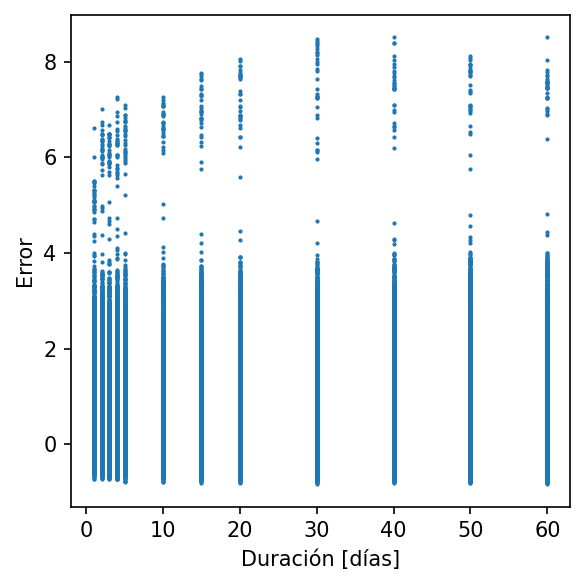

In [107]:
# Graficas de dispersión del error.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(4, 4)
fig.set_dpi(150) 

# Graficamos.
ax.scatter(df_e["DURACION"], df_e["P_ERROR"], s = 1)

# Nombre de ejes.
ax.set_xlabel(f"Duración [días]")
ax.set_ylabel("Error")

fig.tight_layout()
plt.show()

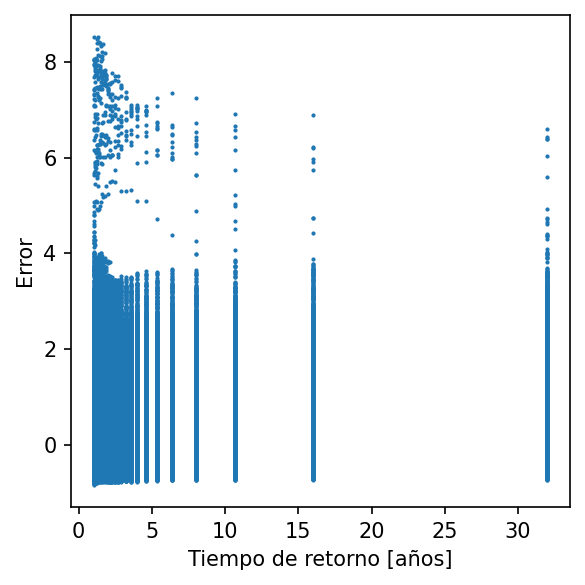

In [108]:
# Graficas de dispersión del error.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(4, 4)
fig.set_dpi(150) 

# Graficamos.
ax.scatter(df_e["TIEMPO_RETORNO"], df_e["P_ERROR"], s = 1)

# Nombre de ejes.
ax.set_xlabel(f"Tiempo de retorno [años]")
ax.set_ylabel("Error")

fig.tight_layout()
plt.show()

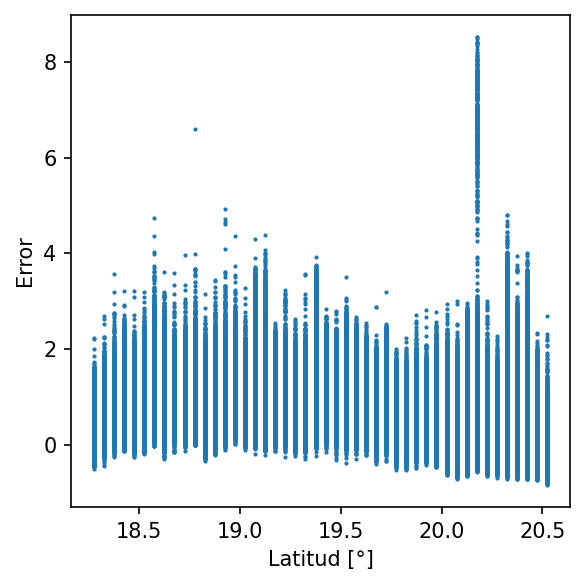

In [109]:
# Graficas de dispersión del error.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(4, 4)
fig.set_dpi(150) 

# Graficamos.
ax.scatter(df_e["LATITUD"], df_e["P_ERROR"], s = 1)

# Nombre de ejes.
ax.set_xlabel(f"Latitud [°]")
ax.set_ylabel("Error")

fig.tight_layout()
plt.show()

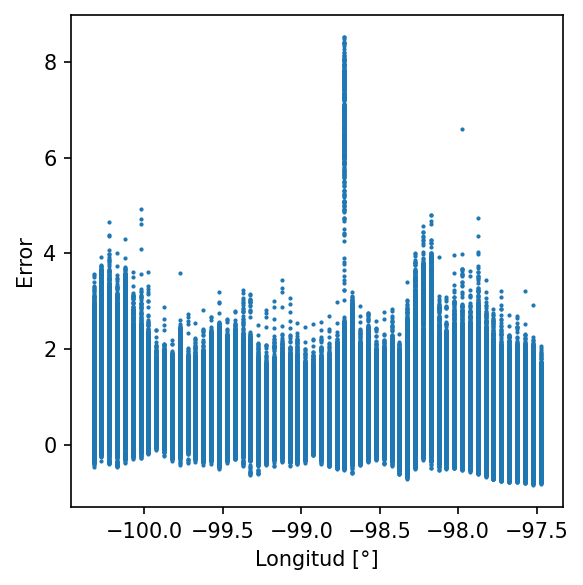

In [110]:
# Graficas de dispersión del error.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(4, 4)
fig.set_dpi(150) 

# Graficamos.
ax.scatter(df_e["LONGITUD"], df_e["P_ERROR"], s = 1)

# Nombre de ejes.
ax.set_xlabel(f"Longitud [°]")
ax.set_ylabel("Error")

fig.tight_layout()
plt.show()

In [111]:
# Error por tiempo de retorno.
tret            = error.to_dataframe().groupby("TIEMPO_RETORNO").count(       )
tret.columns    = [ vars[0] ]
tret[ vars[1] ] = error.to_dataframe().groupby("TIEMPO_RETORNO").mean(        )
tret[ vars[2] ] = error.to_dataframe().groupby("TIEMPO_RETORNO").std(         )
tret[ vars[3] ] = error.to_dataframe().groupby("TIEMPO_RETORNO").min(         )
tret[ vars[4] ] = error.to_dataframe().groupby("TIEMPO_RETORNO").quantile(0.25)
tret[ vars[5] ] = error.to_dataframe().groupby("TIEMPO_RETORNO").quantile(0.5 )
tret[ vars[6] ] = error.to_dataframe().groupby("TIEMPO_RETORNO").quantile(0.75)
tret[ vars[7] ] = error.to_dataframe().groupby("TIEMPO_RETORNO").max(         )

tret.describe()

,count,mean,std,min,25%,50%,75%,max
count,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,32016.0,0.825515,0.496264,-0.771538,0.531876,0.825629,1.108867,7.745401
std,0.0,0.005174,0.025806,0.022983,0.023416,0.013355,0.012286,0.555239
min,32016.0,0.808628,0.479260,-0.832623,0.454881,0.779692,1.098137,6.604713
25%,32016.0,0.823221,0.481981,-0.780616,0.529420,0.821204,1.100351,7.299136
50%,32016.0,0.824952,0.486012,-0.774595,0.537921,0.828372,1.107949,7.726913
75%,32016.0,0.829504,0.496781,-0.763903,0.546196,0.835107,1.112157,8.240811
max,32016.0,0.831799,0.588941,-0.725619,0.549840,0.839193,1.160310,8.510044


In [112]:
# Error por duración.
duracion            = error.to_dataframe().groupby("DURACION").count(       )
duracion.columns    = [ vars[0] ]
duracion[ vars[1] ] = error.to_dataframe().groupby("DURACION").mean(        )
duracion[ vars[2] ] = error.to_dataframe().groupby("DURACION").std(         )
duracion[ vars[3] ] = error.to_dataframe().groupby("DURACION").min(         )
duracion[ vars[4] ] = error.to_dataframe().groupby("DURACION").quantile(0.25)
duracion[ vars[5] ] = error.to_dataframe().groupby("DURACION").quantile(0.5 )
duracion[ vars[6] ] = error.to_dataframe().groupby("DURACION").quantile(0.75)
duracion[ vars[7] ] = error.to_dataframe().groupby("DURACION").max(         )

duracion.describe()

,count,mean,std,min,25%,50%,75%,max
count,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,82708.0,0.825515,0.495468,-0.777003,0.530393,0.825618,1.107925,7.610951
std,0.0,0.030539,0.025582,0.039821,0.050331,0.024296,0.017660,0.714004
min,82708.0,0.786512,0.467060,-0.832623,0.461686,0.795055,1.087355,6.604713
25%,82708.0,0.795438,0.471410,-0.800081,0.483225,0.803447,1.093293,7.074874
50%,82708.0,0.827239,0.493360,-0.792886,0.538024,0.821587,1.103323,7.520667
75%,82708.0,0.855244,0.517555,-0.731330,0.584440,0.846768,1.121094,8.203571
max,82708.0,0.864588,0.534229,-0.721132,0.589716,0.859867,1.134335,8.510044


In [113]:
# Error por latitud.
latitud            = error.to_dataframe().groupby("LATITUD").count(       )
latitud.columns    = [ vars[0] ]
latitud[ vars[1] ] = error.to_dataframe().groupby("LATITUD").mean(        )
latitud[ vars[2] ] = error.to_dataframe().groupby("LATITUD").std(         )
latitud[ vars[3] ] = error.to_dataframe().groupby("LATITUD").min(         )
latitud[ vars[4] ] = error.to_dataframe().groupby("LATITUD").quantile(0.25)
latitud[ vars[5] ] = error.to_dataframe().groupby("LATITUD").quantile(0.5 )
latitud[ vars[6] ] = error.to_dataframe().groupby("LATITUD").quantile(0.75)
latitud[ vars[7] ] = error.to_dataframe().groupby("LATITUD").max(         )

latitud.describe()

,count,mean,std,min,25%,50%,75%,max
count,46.0,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,21576.0,0.825515,0.440398,-0.366151,0.541781,0.811965,1.079331,3.430078
std,0.0,0.208880,0.102694,0.228247,0.214157,0.197081,0.204666,1.158529
min,21576.0,-0.022756,0.337584,-0.832623,-0.260619,0.004181,0.223558,1.994060
25%,21576.0,0.754568,0.384311,-0.524543,0.528551,0.770634,1.009038,2.727659
50%,21576.0,0.884374,0.419720,-0.312878,0.608322,0.859879,1.115988,3.193672
75%,21576.0,0.959880,0.460581,-0.202747,0.670193,0.942040,1.217799,3.841312
max,21576.0,1.059120,0.936458,0.023272,0.788984,1.018506,1.329739,8.510044


In [114]:
# Error por longitud.
longitud            = error.to_dataframe().groupby("LONGITUD").count(       )
longitud.columns    = [ vars[0] ]
longitud[ vars[1] ] = error.to_dataframe().groupby("LONGITUD").mean(        )
longitud[ vars[2] ] = error.to_dataframe().groupby("LONGITUD").std(         )
longitud[ vars[3] ] = error.to_dataframe().groupby("LONGITUD").min(         )
longitud[ vars[4] ] = error.to_dataframe().groupby("LONGITUD").quantile(0.25)
longitud[ vars[5] ] = error.to_dataframe().groupby("LONGITUD").quantile(0.5 )
longitud[ vars[6] ] = error.to_dataframe().groupby("LONGITUD").quantile(0.75)
longitud[ vars[7] ] = error.to_dataframe().groupby("LONGITUD").max(         )

latitud.describe()

,count,mean,std,min,25%,50%,75%,max
count,46.0,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,21576.0,0.825515,0.440398,-0.366151,0.541781,0.811965,1.079331,3.430078
std,0.0,0.208880,0.102694,0.228247,0.214157,0.197081,0.204666,1.158529
min,21576.0,-0.022756,0.337584,-0.832623,-0.260619,0.004181,0.223558,1.994060
25%,21576.0,0.754568,0.384311,-0.524543,0.528551,0.770634,1.009038,2.727659
50%,21576.0,0.884374,0.419720,-0.312878,0.608322,0.859879,1.115988,3.193672
75%,21576.0,0.959880,0.460581,-0.202747,0.670193,0.942040,1.217799,3.841312
max,21576.0,1.059120,0.936458,0.023272,0.788984,1.018506,1.329739,8.510044


In [115]:
# Dsitribución espacial del error.

espacial = error.count( ["DURACION", "TIEMPO_RETORNO"]
    ).rename( {"P_ERROR": vars[0]} )
espacial[ vars[1] ]  = error.mean( ["DURACION",
    "TIEMPO_RETORNO"] )[ "P_ERROR" ]
espacial[ vars[2] ] = error.std( ["DURACION",
    "TIEMPO_RETORNO"] )[ "P_ERROR" ]
espacial[ vars[3] ] = error.min( ["DURACION",
    "TIEMPO_RETORNO"] )[ "P_ERROR" ]
espacial[ vars[4] ] = error.quantile( 0.25, ["DURACION",
    "TIEMPO_RETORNO"] )[ "P_ERROR" ]
espacial[ vars[5] ] = error.quantile( 0.5,  ["DURACION",
    "TIEMPO_RETORNO"] )[ "P_ERROR" ]
espacial[ vars[6] ] = error.quantile( 0.75, ["DURACION",
    "TIEMPO_RETORNO"] )[ "P_ERROR" ]
espacial[ vars[7] ] = error.max( ["DURACION",
    "TIEMPO_RETORNO"] )[ "P_ERROR" ]

espacial.to_netcdf("../results/comp_hist_CHIRPS_espacial.nc")

desc = latitud.describe().copy()

for v in vars:
    desc[ v ] = [ espacial[ v ].count(       ).values + 0,
                  espacial[ v ].mean(        ).values + 0,
                  espacial[ v ].std(         ).values + 0,
                  espacial[ v ].min(         ).values + 0,
                  espacial[ v ].quantile(0.25).values + 0,
                  espacial[ v ].quantile(0.5 ).values + 0,
                  espacial[ v ].quantile(0.75).values + 0,
                  espacial[ v ].max(         ).values + 0 ]

desc

,count,mean,std,min,25%,50%,75%,max
count,2668.0,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000
mean,372.0,0.825515,0.179192,0.304427,0.709180,0.819887,0.939586,1.492480
std,0.0,0.458329,0.069027,0.385384,0.446959,0.464581,0.478944,0.668231
min,372.0,-0.656177,0.048410,-0.832623,-0.732178,-0.674133,-0.599517,-0.396021
25%,372.0,0.557208,0.132382,0.044298,0.445076,0.542728,0.662248,1.098814
50%,372.0,0.832125,0.164272,0.322515,0.731220,0.832004,0.931449,1.426185
75%,372.0,1.096439,0.211781,0.556714,0.983237,1.092623,1.215748,1.817124
max,372.0,6.612451,1.035886,2.444550,6.060491,6.679532,7.392852,8.510044
